<h1 style="text-align: left; font-weight: bold; font-size: 36px; ">Loan Credit Prediction</h1>

**Author**: Bradley Stephen

**Date**: December 2024  

#  Overview  

<p style="font-size: 16px;">This notebook aims to predict loan repayment behavior using Artificial Neural Network (ANN) models. By analyzing borrower features such as credit score, debt-to-income ratio, loan purpose, interest rates, and payment history, the study seeks to classify whether a borrower is likely to fully repay their loan.

The dataset undergoes preprocessing steps like scaling, one-hot encoding, and applying SMOTE to address class imbalances. The neural network model incorporates techniques like regularization, dropout, and early stopping to improve generalization and prevent overfitting.

The objective is to generate actionable insights that help investors evaluate loan repayment risks and make well-informed investment decisions.
</p>


# Table of Contents
- [Data Loading](#Data-Loading)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Data Preprocessing](#Data-Preprocessing)
- [Model Training](#Model-Training)
- [Model-Evaluation](#Model-Evaluation)
- [Conclusion](#Conclusion)

## Objectives  
<p style="font-size: 16px;">- Explore the relationships between borrower features such as credit score, debt-to-income ratio, loan purpose, and interest rate with loan repayment behavior. <br>
- Perform data visualization to gain insights into the distributions of key features and their correlations with loan repayment status. <br>
- Apply ANN techniques to build predictive models that can classify loan repayment likelihood with high accuracy. <br>
- Provide insights that can help investors and stakeholders assess loan repayment risks and make informed investment decisions.</p>


## Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/loan_data.csv')

## Exploratory Data Analysis

In [ ]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
    df.size

134092

In [ ]:
df.shape

(9578, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

## Data Viualization

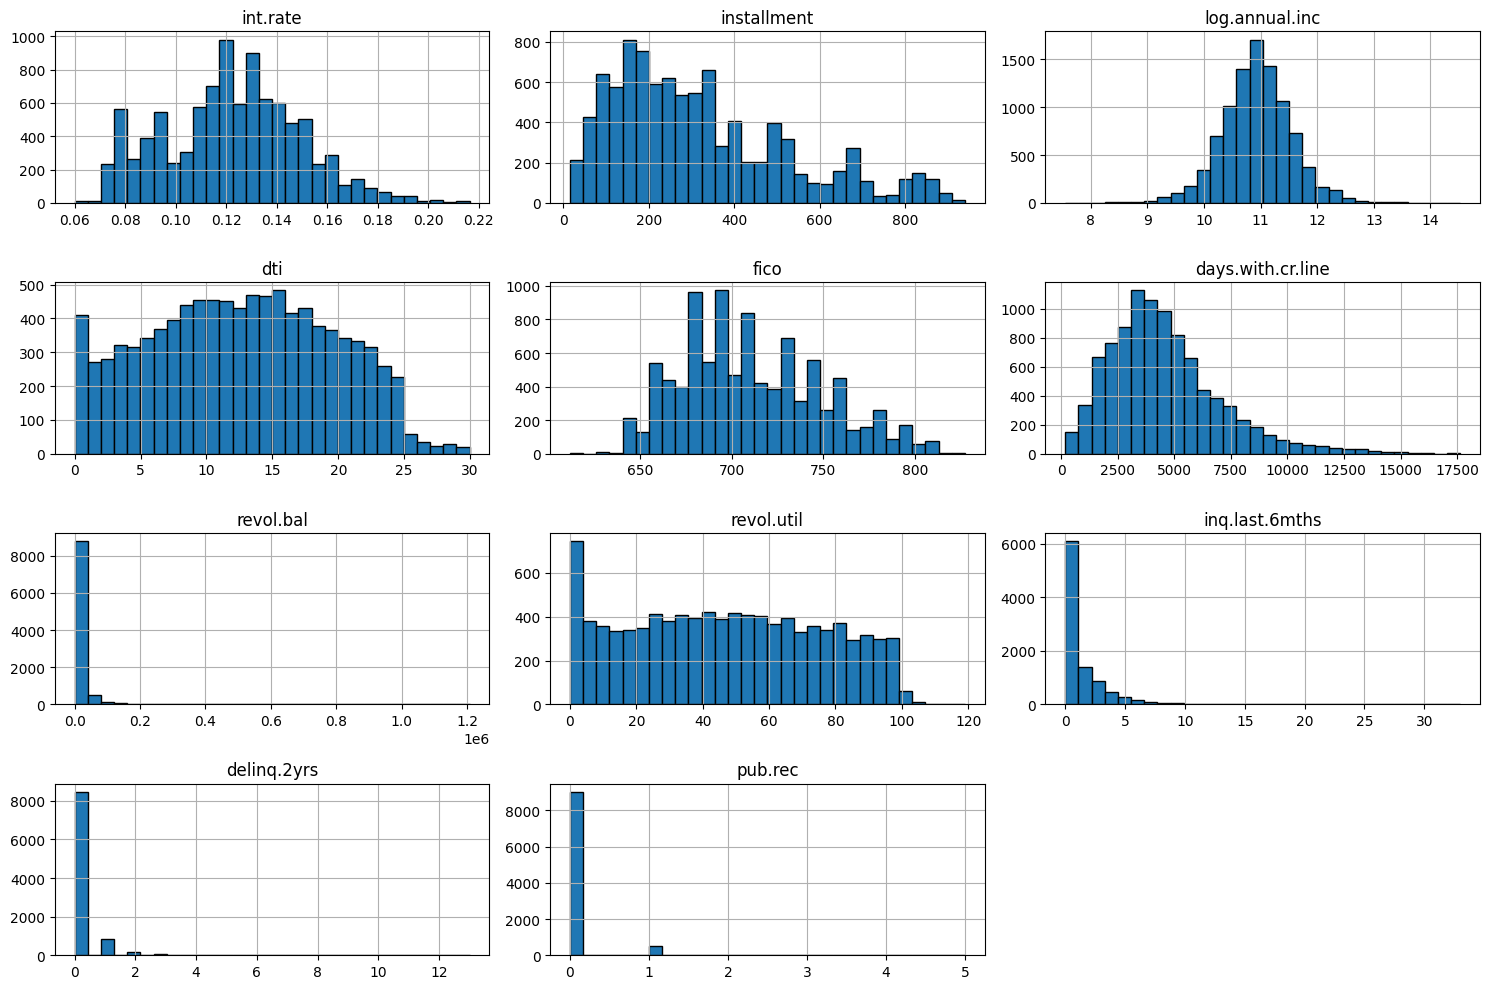

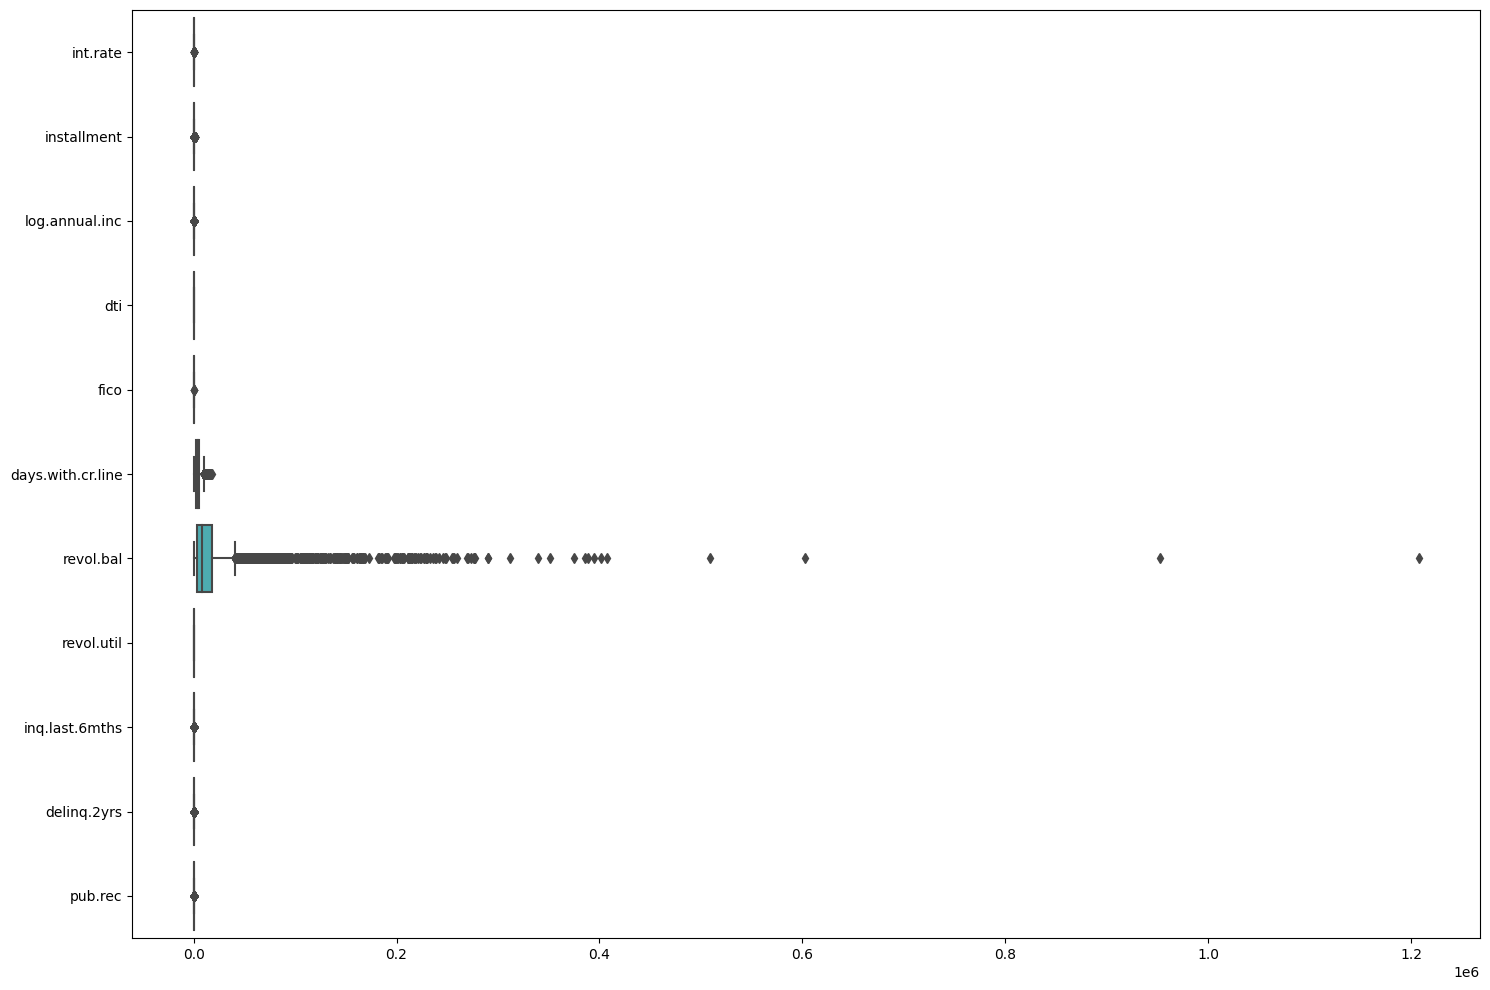

In [ ]:
# Plot to visuaize the distribution of Numerical Features

numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line',
                  'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
df[numerical_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient="h")
plt.tight_layout()
plt.show()

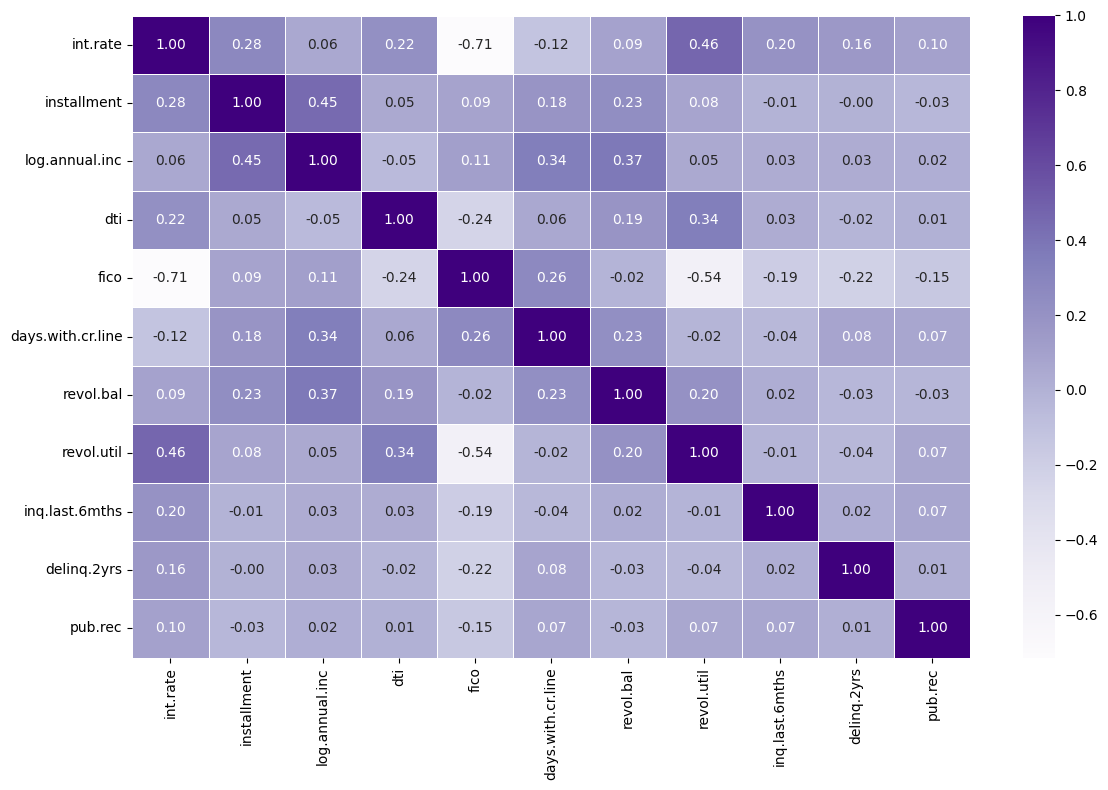

In [ ]:
# Correlation Heatmap

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()

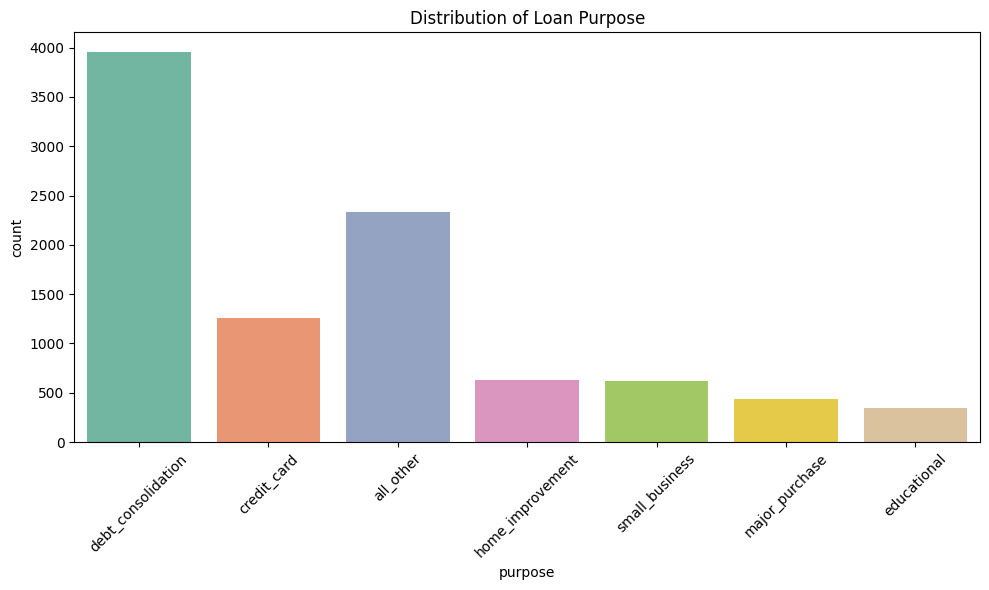

In [ ]:
# Countplot for Categorical Features (Loan Purpose)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purpose', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribution of Loan Purpose')
plt.tight_layout()
plt.show()

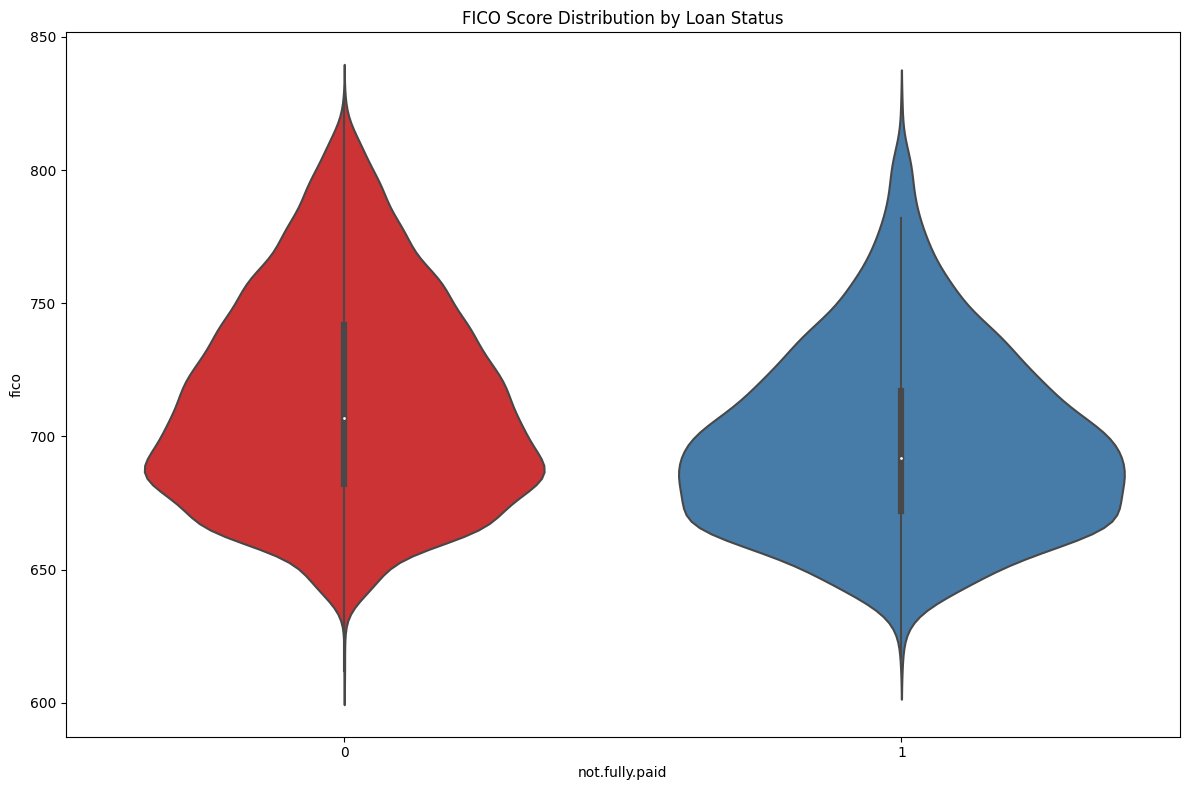

In [ ]:
# Violin Plot for Numerical Features by Loan Status

plt.figure(figsize=(12, 8))
sns.violinplot(x='not.fully.paid', y='fico', data=df, palette='Set1')
plt.title('FICO Score Distribution by Loan Status')
plt.tight_layout()
plt.show()

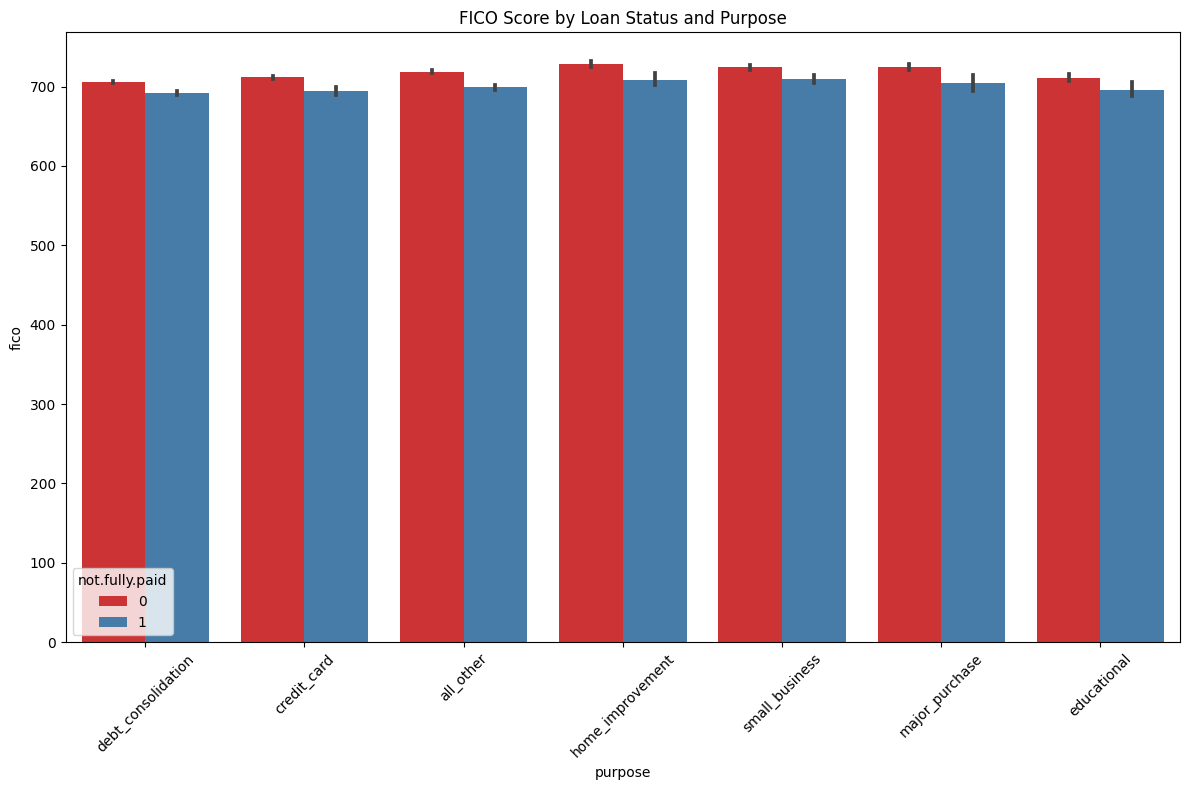

In [ ]:
# Barplot for Mean Numerical Features by Loan Status

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='purpose', y='fico', hue='not.fully.paid', palette='Set1')
plt.xticks(rotation=45)
plt.title('FICO Score by Loan Status and Purpose')
plt.tight_layout()
plt.show()

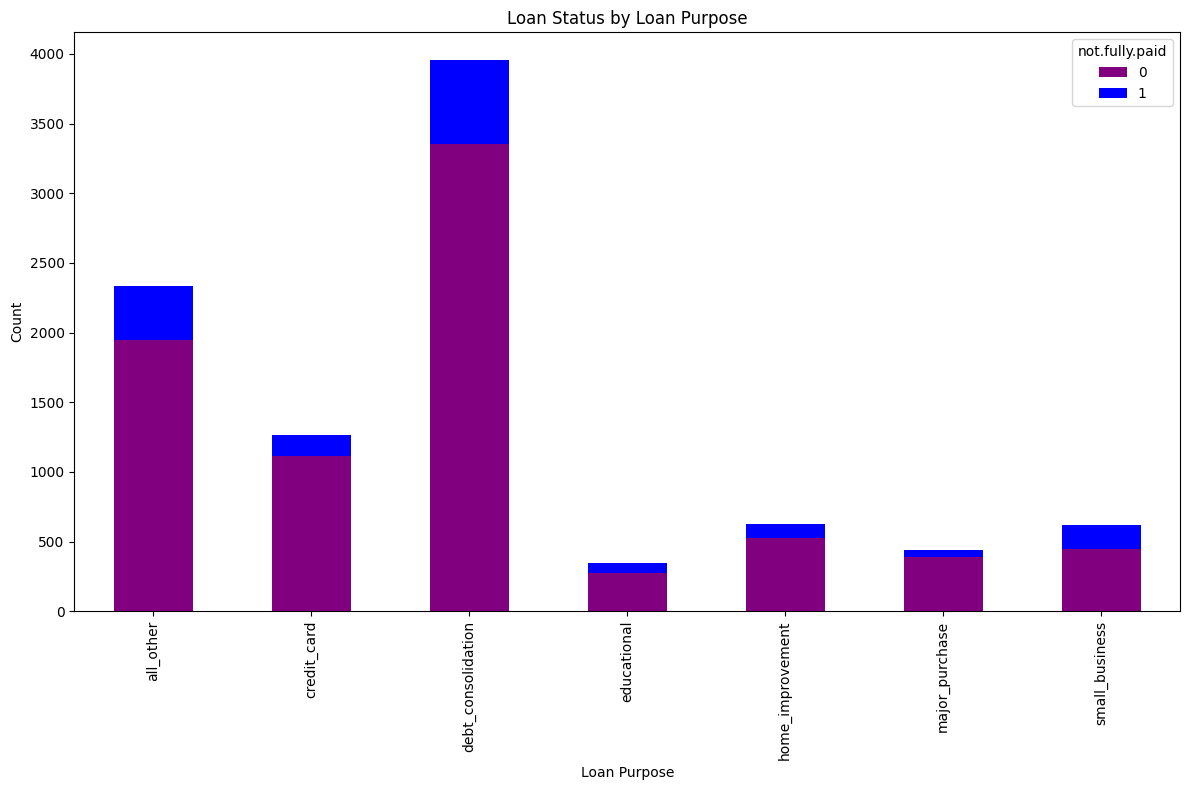

In [ ]:
# Correlation of Loan Status with Categorical Features (Stacked Bar Chart)

contingency_table = pd.crosstab(df['purpose'], df['not.fully.paid'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8), color=['purple', 'blue'])
plt.title('Loan Status by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

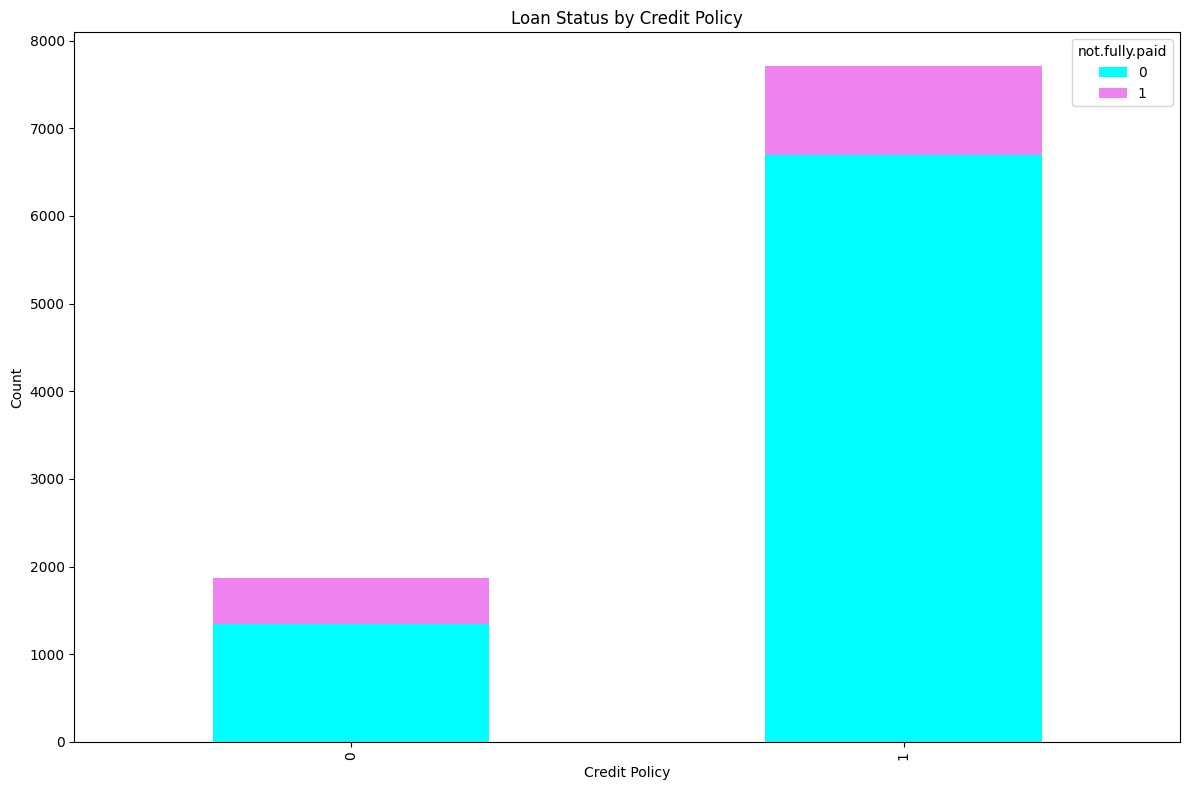

In [ ]:
# Stacked Bar Plot for Loan Status by Credit Policy

contingency_table_credit_policy = pd.crosstab(df['credit.policy'], df['not.fully.paid'])
contingency_table_credit_policy.plot(kind='bar', stacked=True, figsize=(12, 8), color=['cyan', 'violet'])
plt.title('Loan Status by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

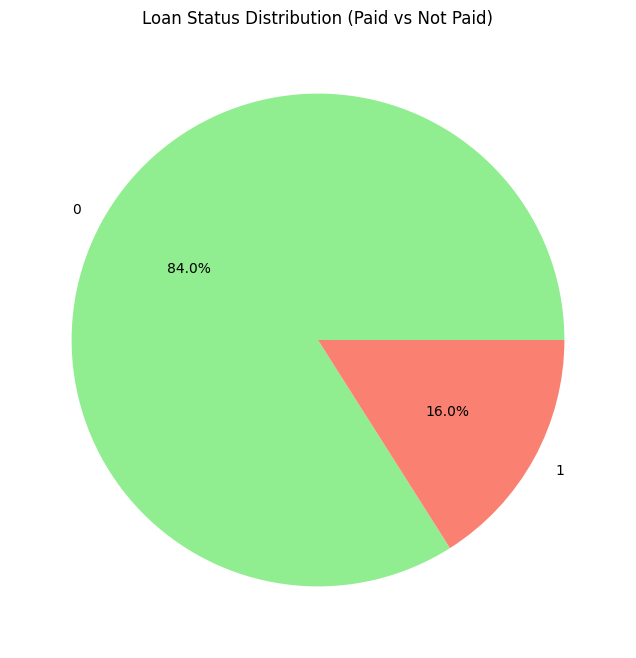

In [ ]:
# Pie Chart for Loan Status Distribution

loan_status_counts = df['not.fully.paid'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Loan Status Distribution (Paid vs Not Paid)')
plt.show()

## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify numerical and categorical columns for ohe and standard scaling

numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Scaling our data and removing outlier

from scipy.stats import zscore

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = df[numerical_columns].apply(zscore)
df = df[(np.abs(df) < 3).all(axis=1)]

print(f"Original number of rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")

Original number of rows: 8282
Rows after outlier removal: 8282


In [ ]:
# Handling class imbalance using SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

In [ ]:
# Computing class weights to handle any class imbalance during training

class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(enumerate(class_weights))

## Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_resampled.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [ ]:
history = model.fit(
    X_resampled, y_resampled,
    validation_data=(X_test_processed, y_test),
    epochs=50,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7514 - loss: 0.6570 - val_accuracy: 0.8826 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 2/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.4563 - val_accuracy: 0.8894 - val_loss: 0.3774 - learning_rate: 0.0010
Epoch 3/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.4130 - val_accuracy: 0.9008 - val_loss: 0.3263 - learning_rate: 0.0010
Epoch 4/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.3803 - val_accuracy: 0.9222 - val_loss: 0.2829 - learning_rate: 0.0010
Epoch 5/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.3388 - val_accuracy: 0.9269 - val_loss: 0.2602 - learning_rate: 0.0010
Epoch 6/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.3134 - val_accuracy: 0.9259 - val_loss: 0.2464 - learning_rate: 0.0010
Epoch 7/50
386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9076 - loss: 0.2973 - 

## Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.0982
Test Loss: 0.09661088138818741, Test Accuracy: 0.9749478101730347


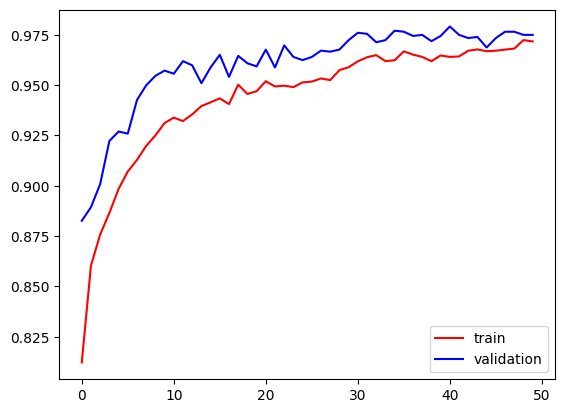

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

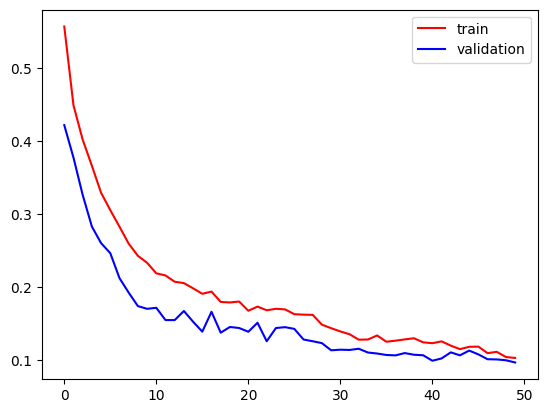

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Conclusion

In this notebook, I developed a model to predict loan repayment status using key features such as loan purpose, interest rate, FICO score, and debt-to-income ratio. Through comprehensive data preprocessing, addressing class imbalance, and training a neural network model, the approach achieved an impressive accuracy of approximately 98%.

This high level of accuracy highlights the model's effectiveness in predicting whether a borrower will fully repay their loan, offering valuable insights for investors evaluating lending risks. These predictions can play a crucial role in guiding decision-making within the financial sector. Future enhancements could involve incorporating additional features, experimenting with more advanced models, or integrating external economic factors to further improve predictive accuracy.
